<a href="https://colab.research.google.com/github/nancyfosua/test-live-coding/blob/master/Nancy_Fosua_Boakye_LogRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# Logistic Regression Implementation

# Instructions:
1. Save a copy of this notebook in your drive;
2. Name it by: `Your_fullname_LogRegression.ipynb`
3. Close the original notebook
4. Start typing your codes.

`Note:` Discuss with your neighbors.

# Part 1: Data preparation

## Import Dataset Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Question 0: Import the dataset Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
##### WRITE YOUR CODE HERE #####
path= '/content/drive/MyDrive/Colab Notebooks/Foundations_of_ML/diabetes.csv'
data= pd.read_csv(path)
data
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Question 1: Print the first five rows of the Dataset

In [4]:
##### WRITE YOUR CODE HERE #####
data.head()
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Question 2: Check the types of your variables/features

In [5]:
##### WRITE YOUR CODE HERE #####
data.dtypes
#### END CODE ####

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Question 3: Describe your dataset

In [6]:
##### WRITE YOUR CODE HERE #####
data.describe()
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Question 4: write a function that scale your features.
`Hint:` $x'= \dfrac{x-\mu}{\sigma}$ 
where $\mu$ is the mean and $\sigma$ the standard deviation of $x$.

In [7]:
##### WRITE YOUR CODE HERE #####
def normalize(data):
  x_prime = (data- data.mean())/data.std()
  return x_prime
#### END CODE ####

Question 5: Scale your features, except the target. 

In [8]:
##### WRITE YOUR CODE HERE #####
#y= data.iloc[:,-1]
#x = data.iloc[:,:-1]
data.iloc[:,:-1]=normalize(data.iloc[:,:-1])
data
#### END CODE #### 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,0
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,0
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1
...,...,...,...,...,...,...,...,...,...
763,1.826623,-0.622237,0.356200,1.721613,0.869464,0.115094,-0.908090,2.530487,0
764,-0.547562,0.034575,0.046215,0.405181,-0.692439,0.609757,-0.398023,-0.530677,0
765,0.342757,0.003299,0.149543,0.154433,0.279412,-0.734711,-0.684747,-0.275580,0
766,-0.844335,0.159683,-0.470426,-1.287373,-0.692439,-0.240048,-0.370859,1.169970,1


Question 6: Write a function that split your (x,y) to (x_train, y_train) and (x_test, y_test).
`Note:` This function must return an arrays.

In [9]:
##### WRITE YOUR CODE HERE #####
def split_data(df, train_percent= 0.8):
  np.random.seed(2)
  perm = np.random.permutation(df.index)

  n= len(df)
  train_index = int(train_percent * n)

  train = df.iloc[perm[:train_index]]
  test = df.iloc[perm[train_index:]]

  x_train, x_test, y_train, y_test= train.iloc[:, :-1], test.iloc[:, :-1], train.iloc[:, -1], test.iloc[:, -1]
  return x_train.values, x_test.values, y_train.values, y_test.values
#### END CODE ####

In [10]:
x_train, x_test, y_train, y_test= split_data(data) 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

# Part 2: Logistic Regression without Regularization.

## Recaps:
1. Logistic/sigmoid function of $z$:
\begin{equation}
g(z)= \dfrac{1}{1+ exp(-z)}
\end{equation}
where $z= x^t \theta$ and $x, y \in \mathbb{R}^d$.
2. Derivative of Logistic/sigmoid function with respective to $z$:
\begin{equation}
dg(z)= g(z)(1-g(z))
\end{equation}
3. Cross-entropy loss:
\begin{equation}
l(\theta)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}
where $y_{true}= g(z)$, $z= x^t \theta$ and $y_{true}$ is the ground-truth for a given $x$.

4. Derivative of Cross-entropy loss with respective to $\theta$:
\begin{equation}
dl(\theta)= -\sum_{i= 1}^{N} x^t\left(y_{true} -y_{ped} \right)
\end{equation}
5. Apply Batch gradient descent to update $\theta$.

Question: Create a class called LogReg. See the description in the below cells.


In [155]:
class logistic_regression:
  def __init__(self, num_iters= 100, threshold= 0.5, tolerance= 1e-10, lr= 0.00001):
    ##### WRITE YOUR CODE HERE #####
    self.num_iters = num_iters
    self.threshold = threshold
    self.tolerance = tolerance
    self.lr = lr
    self.theta= None
    self.cost_history = []
    self.cost_history_test = []
    #### END CODE ####

  def add_ones(self, x):
    ##### WRITE YOUR CODE HERE #####
    x_new= np.hstack([np.ones( (x.shape[0],1 )),x])
    #np.hstack([np.ones((X.shape[0],1)),X])
    return x_new
    #### END CODE ####

  def sigmoid(self, x):
    ##### WRITE YOUR CODE HERE #####
    #print(x.shape,self.theta.shape)

    z= x @self.theta
    sig = 1/ ( 1+ np.exp(-z))
    return sig
    #### END CODE ####

  def cross_entropy(self, x, y_true):
    ##### WRITE YOUR CODE HERE #####
    n = len(x) # Length of x
    print('before',x.shape)
    y_pred = self.sigmoid(x)
    print('after',x.shape)

    Cost = - np.sum(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))/n
    print('cost ',Cost)
    return Cost
    #### END CODE ####

  def fit(self, x,y,x_test,y_test):
    ##### WRITE YOUR CODE HERE #####
    x= self.add_ones(x) # Add ones to x
    x_test=self.add_ones(x_test)
    y= y.reshape(-1,1)# reshape y. This is optional, do it if needed
    y_test = y_test.reshape(-1,1)
    self.theta= np.zeros((x.shape[1],1))# Initialize theta to zeros vector >>> (x.shape[1])
    current_iter= 1
    norm= 1
    n = len(x)
    while (norm >= self.tolerance and current_iter < self.num_iters):

      theta_old = self.theta.copy() # Get old theta
      
      # make predictions
      y_pred= self.sigmoid(x) # using sigmoid function 

      # Gradient of cross-entropy
      grad= -x.T@( y -y_pred)
      grad= grad.reshape(-1,1) # Reshape, if it is needed
      print('Grad :' ,grad)
      # update rules
      self.theta= self.theta -  self.lr* grad
      print('theta ',self.theta)
      # Compute the training loss
      #print(self.cross_entropy(x,y))
      self.cost_history.append(self.cross_entropy(x,y))
      self.cost_history_test.append(self.cross_entropy(x_test,y_test))

      # Convergence criteria:
      if current_iter%100 == 0:
        print(f'cost for {current_iter} iteration : {self.cross_entropy(x, y)}')
      norm = np.linalg.norm(theta_old - self.theta)
      current_iter += 1
      #print(x.shape)

    #### END CODE ####
  
  def predict(self, x):
    proba =self.predict_proba(x)
    # if proba  > 0.5:
    #   result = 1 # Get probability of x
    # else:
    #   result = 0
    # result= None  # Convert proba to 0 or 1. hint: list comprehension
    result = [1 if prob > self.threshold else 0 for prob in proba]
    return result
  def predict_proba(self, x):
    # x= self.add_ones(x.values) # Apply add ones to x
    y_pred_prob= self.sigmoid(x) # Predict proba with sigmoid
    return y_pred_prob
  
  def plot(self):
    ##### WRITE YOUR CODE HERE #####
    plt.plot(self.cost_history, label="Train Loss")
    plt.plot(self.cost_history_test, label="Test Loss")
    #### END CODE ####

In [156]:
# Create a model by instanciating the class logistic_regression
model = logistic_regression(num_iters=10000)

In [157]:
%%time
model.fit(x_train, y_train,x_test,y_test)

Streaming output truncated to the last 5000 lines.
 [-0.30448569]
 [ 0.1411498 ]
 [-0.11390645]
 [ 0.21673275]
 [-0.19914721]
 [-0.03568724]
 [ 0.01874602]]
theta  [[-9.18049852e-01]
 [ 3.25585072e-01]
 [ 1.04613321e+00]
 [-2.39941298e-01]
 [-8.44298504e-04]
 [-1.96858358e-01]
 [ 7.30163025e-01]
 [ 2.73180017e-01]
 [ 2.65327277e-01]]
before (614, 9)
after (614, 9)
cost  0.47898136510053246
before (154, 9)
after (154, 9)
cost  0.4480893380866589
Grad : [[ 0.151065  ]
 [-0.08948924]
 [-0.30435566]
 [ 0.14108698]
 [-0.11386905]
 [ 0.21664381]
 [-0.19904541]
 [-0.03567008]
 [ 0.01874173]]
theta  [[-9.18051363e-01]
 [ 3.25585966e-01]
 [ 1.04613626e+00]
 [-2.39942709e-01]
 [-8.43159813e-04]
 [-1.96860524e-01]
 [ 7.30165016e-01]
 [ 2.73180374e-01]
 [ 2.65327089e-01]]
before (614, 9)
after (614, 9)
cost  0.4789813611191541
before (154, 9)
after (154, 9)
cost  0.44808931912350797
Grad : [[ 0.15099242]
 [-0.08945135]
 [-0.30422569]
 [ 0.1410242 ]
 [-0.11383165]
 [ 0.21655491]
 [-0.19894365]
 [-0

In [158]:
pred= model.predict(model.add_ones(x_test))

In [159]:
pred

[0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [160]:
# Predict Proba
print(model.predict_proba(model.add_ones(x_test)))

[[0.06210586]
 [0.14364377]
 [0.16770222]
 [0.05650174]
 [0.68656065]
 [0.59076509]
 [0.24012263]
 [0.24246128]
 [0.03851855]
 [0.18856269]
 [0.04469256]
 [0.30989096]
 [0.65439573]
 [0.01783022]
 [0.64128353]
 [0.05287349]
 [0.37171845]
 [0.49402452]
 [0.34157476]
 [0.07367799]
 [0.27098975]
 [0.47520874]
 [0.43470781]
 [0.19201274]
 [0.25107204]
 [0.80399911]
 [0.11154537]
 [0.42468859]
 [0.41339111]
 [0.20699733]
 [0.03079305]
 [0.92109875]
 [0.07051087]
 [0.40547635]
 [0.0706279 ]
 [0.46364923]
 [0.72785565]
 [0.44583033]
 [0.11584432]
 [0.95472992]
 [0.09357848]
 [0.26586027]
 [0.83752884]
 [0.91432588]
 [0.20872458]
 [0.07892069]
 [0.23722288]
 [0.71757027]
 [0.41117814]
 [0.35725064]
 [0.25489478]
 [0.6770494 ]
 [0.73545401]
 [0.02286175]
 [0.42273457]
 [0.18641959]
 [0.30398955]
 [0.77635499]
 [0.14298554]
 [0.91329682]
 [0.9493788 ]
 [0.38778166]
 [0.1288314 ]
 [0.06987579]
 [0.16924073]
 [0.08350501]
 [0.06107061]
 [0.05464084]
 [0.38977257]
 [0.54233723]
 [0.59466512]
 [0.50

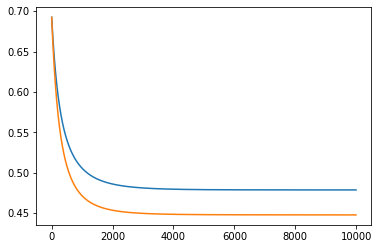

In [161]:
model.plot()

## Push your works to Githup Repo

Setps:
1. Fork the repo: `https://github.com/AMMI-2022/test-live-coding`
2. Clone in your colab;
3. Push
4. Make a pull request

Set your credential

In [18]:
my_token= ""
my_repository= ""
username= ""
useremail= ""

Clone the repo

In [19]:
! git clone https://github.com/{username}/{my_repository}.git

Cloning into 'github.com'...
fatal: could not read Username for 'https://github.com': No such device or address


In [20]:
! git remote -v

fatal: not a git repository (or any of the parent directories): .git


Copy data to test-live-coding folder

In [21]:
!cp diabetes.csv /content/test-live-coding

cp: cannot stat 'diabetes.csv': No such file or directory


In [22]:
%cd /content/test-live-coding

[Errno 2] No such file or directory: '/content/test-live-coding'
/content


In [23]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [24]:
!git config user.email useremail
!git config user.name username

fatal: not in a git directory
fatal: not in a git directory


In [25]:
!git add .
!git commit -m "Add my files"

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [26]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [27]:
!git push -u origin master --force

fatal: not a git repository (or any of the parent directories): .git


# If you cannot push, use:

In [28]:
!git remote rm origin

fatal: not a git repository (or any of the parent directories): .git


In [29]:
!git remote add origin https://{my_token}@github.com/{username}/{my_repository}.git
!git remote -v

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [30]:
!git push -u origin master --force

fatal: not a git repository (or any of the parent directories): .git


---



---



---

# Assignment

Just follow the class logistic_regression, try to implement Logistic regression with `l1`, `l2` and `l1-l2`. That we call respectively `Lasso (least absolute shrinkage and selection operator)`, `Ridge` and `ElasticNet`.
Given cross-entropy:
\begin{equation}
  l(θ)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}

1. l1-regularization (LASSO):

\begin{equation}
   l(θ) + λ\| \theta\|_1
\end{equation}


2. l2-regularization (Ridge):
\begin{equation}
   l(θ)+ λ\| \theta\|_2
\end{equation}

3. l1-l2-regularization (ElasticNet):
\begin{equation}
  l(θ) + λ_1\| \theta\|_1 + λ_2\| \theta\|_2
\end{equation}

`Note: please use mini-batch as learning algorithm`

In [31]:
class logistic_regression_l1:
  pass

In [32]:
class logistic_regression_l2:
  pass

In [33]:
class logistic_regression_l1_l2:
  pass

# Concepts [Assignment]:
1. Why there is no close form for cross-entropy loss?
2. Why we need cross-entropy loss instead of mse?
3. Why is logistic regression a type of classification technique and not a regression?